# Proba

Nous étudions les familles ayant deux enfants exactement.

## Questions
-  1. L'enfant aîné est une fille. Quelle est la probabilité que les deux enfants soient des filles ?
-  2. Au moins l'un des deux est une fille. Quelle est la probabilité que les deux enfants soient des filles ?

----

- Avec un tableau on aurait respectivement pour 1) et 2)
- sachant BG GG donc une chance sur 2 : 1/2
- sachant BG GG GB et donc : 1/3

## Moralité 

si on sait que au moins un des deux est une fille alors on a deux fois plus de chance que 
le deuxième enfant soit un garçon.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Constantes 
# N nombre d'essai pour mon expérience
NB_EXPERIENCE = 1_000
NB_CHILD = 2
PRECISION = 2

In [3]:
# expérience

# on lance les expériences
def simulate(nb_exp = NB_EXPERIENCE):
    both_girls = 0 # les deux sont des filles
    older_girl = 0 # l'aîné est une fille
    either_girl = 0 # au moins l'un des deux est une fille
    
    for _ in range(nb_exp):
        younger, older = np.random.choice(['girl', 'boy'], NB_CHILD)

        #  Le nombre de familles dont l'ainé est une fille
        if older == 'girl':
            older_girl += 1

         #  Le nombre de familles dont les deux enfants sont une fille
        if older == 'girl' and younger == 'girl':
            both_girls += 1

         #  Le nombre de familles qui ont au moins une fille
        if older == 'girl' or younger == 'girl':
            either_girl += 1
            
    return { 
        'pBothGirlsOlderGirl' : both_girls/older_girl , 
        'pBothGirlEitherGirl' : both_girls/either_girl
    }
        

In [4]:
# On répète 1_000 fois l'expérience que l'on vient de faire puis on la met dans une liste 
# et enfin dans un DataFrame.
stat = []
for s in [ simulate() for _ in range(1_000) ]:
    stat.append([s['pBothGirlsOlderGirl'], s['pBothGirlEitherGirl']])

In [5]:
np.array(stat).shape

(1000, 2)

In [6]:
dfSimulate = pd.DataFrame(np.array(stat), columns=['pBothGirlsOlderGirl', 'pBothGirlEitherGirl'])

In [7]:
dfSimulate.head()

,pBothGirlsOlderGirl,pBothGirlEitherGirl
0,0.526839,0.350066
1,0.485323,0.328477
2,0.524096,0.348930
3,0.511673,0.354447
4,0.481038,0.314621


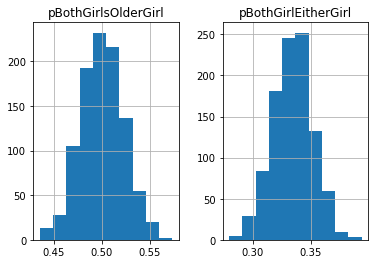

In [8]:
ax = dfSimulate.hist();

In [32]:
NB_CHILD = 3
N = 1_000
all_girls = 0 # tous des filles
older_girl = 0 # l'aîné est une fille
either_girl = 0 # au moins l'un des deux est une fille

for _ in range(N):
        younger, middle, older = np.random.choice(['girl', 'boy'], NB_CHILD)

        #  Le nombre de familles dont l'ainé est une fille
        if older == 'girl':
            older_girl += 1

         #  Le nombre de familles dont les deux enfants sont une fille
        if older == 'girl' and younger == 'girl' and middle == 'girl':
            all_girls += 1

         #  Le nombre de familles qui ont au moins une fille
        if older == 'girl' or younger == 'girl' or middle == 'girl':
            either_girl += 1
            
print(either_girl/N)

0.877


In [33]:
7/8

0.875